<h1 style="font-family:Impact,Arial;font-size:70px;">Pandas &#8212;  Part II: Blood group</h1>
<h2 style="font-familﬁy:Arial;">Matias Quiroz (original: Adel Rahmani)</h2>
<p><small> School of Mathematical &amp; Physical Sciences<br>
University of Technology Sydney
</small></p>
<p>
<a href="mailto:matias.quiroz@uts.edu.au" target="_blank">
<small><font color=MediumVioletRed>matias.quiroz@uts.edu.au</font></small></a>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

<div style="background-color:#F2FBEF;">
<h2><font color=#04B404>After completing this notebook you should:</font></h2>
<br>
<ul>
<li> Understand how group operation and aggregation works in detail.</li><br>
</ul>
</div>

<div style="background-color:#ADD8E6;">
<h2><font color=#00008B>Suggested way of working with the lecture notebooks:</font></h2>
<br>

<ul>
<li> Open a new empty notebook document through `File->New Notebook->Python 3 (ipykernel)` (or similar depending on version).</li><br>
<li> Keep two documents open. This notebook (or its HTML version) and the notebook you created above. </li><br>
<li> Type your solutions/code in the notebook you created. Avoid copy-pasting as much as possible: You need to develop the "muscle memory" that comes with writing code.</li><br>
</ul>
</div>

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Note:</font> </h3>
We refer to <em>Wes McKinney</em>'s book <b>Python for Data Analysis, 2nd edition</b> as <b>PDA</b>.<br>

(The page numbers refer to the PDF version of the ebook.)

<a href="http://pandas.pydata.org/"><img src="https://covers.oreillystatic.com/images/0636920050896/lrg.jpg" width="150" /></a> <br>

The datasets used in the book are available from https://github.com/pydata/pydata-book.<br>

<p>If you want to download the entire repository to your computer you can use <code>git</code> to do it.<br> 

In the <code>Terminal</code> (or the command line console in Windows), go to the directory where you want to download the repository and enter:</p>
<pre><code>git clone https://github.com/pydata/pydata-book.git</code></pre>
<br>
</div>

In [1]:
from math import *
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline
import matplotlib.pyplot as plt

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1> 1. Pandas GroupBy</h1>

To illustrate how the pandas <code>groupby</code> operation works let us use some fake data. With `numpy` it is trivial to generate random numerical data, however, it is usually a lot more tedious to generate random people data that looks realistic.

A very useful tool for this is the [Fake Name Generator](http://www.fakenamegenerator.com/). That is what I used to generate 
this dataset. 

Let us load the dataset into a dataframe.

In [2]:
input_path = Path('people.csv')

data = pd.read_csv(input_path, encoding='utf-8')

In [3]:
data.head()

,GivenName,Surname,Gender,StreetAddress,City,Country,Birthday,BloodType
0,Stepanida,Sukhorukova,female,62 Ockham Road,EASTER WHYNTIE,United Kingdom,8/25/1968,A+
1,Hiệu,Lương,male,4 Iolaire Road,NEW CROSS,United Kingdom,1/31/1962,A+
2,Petra,Neudorf,female,56 Victoria Road,LISTON,United Kingdom,1/10/1964,B+
3,Eho,Amano,female,83 Stroud Rd,OGMORE,United Kingdom,4/12/1933,O-
4,Noah,Niland,male,61 Wrexham Rd,FACEBY,United Kingdom,11/20/1946,A+


The data contains information about fictitious people.

In [4]:
data.count()

GivenName        5000
Surname          5000
Gender           5000
StreetAddress    5000
City             5000
Country          5000
Birthday         5000
BloodType        5000
dtype: int64

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>We have got <a href="http://www.abs.gov.au/websitedbs/a3121120.nsf/home/statistical+language+-+what+are+variables">different types of variables</a>. For instance, <code>Gender</code> is a categorical variable, so are <code>BloodType</code> and <code>Country</code>. </p>
<p><code>Birthday</code> can be thought of as an interval variable, although we will convert it to an <code>Age</code> variable, which is more convenient for our purpose, and will be treated as a continuous numeric variable. </p>
<p>Notice, however, that by default pandas will identify non-numeric data as a generic object, which is not the most efficient way of handling categorical data. Let us fix that.</p>
</div>

In [5]:
data.dtypes

GivenName        object
Surname          object
Gender           object
StreetAddress    object
City             object
Country          object
Birthday         object
BloodType        object
dtype: object

In [6]:
data['Gender']  = data['Gender'].astype('category')
data['Country'] = data['Country'].astype('category')
data['BloodType']  = data['BloodType'].astype('category')
data.dtypes

GivenName          object
Surname            object
Gender           category
StreetAddress      object
City               object
Country          category
Birthday           object
BloodType        category
dtype: object

<h3> <center><font color=MediumVioletRed>A. Dealing with dates.</font></center></h3>

<h4>Method 1 - <code>datetime</code> module.</h4>

One of the features (columns) in our dataset is <code>Birthday</code>. While this information may be useful if you wanted to
find out, for instance, how many people share a birthday, most of the time we mainly care about their age.

One way to convert the <code>Birthday</code> into an <code>Age</code> feature would be to extract the year and compute the current year minus
the birthday year. The <code>split</code> method of string objects could be used for that, however, there is a more elegant, and general
way of handling dates in Python using the <a href="https://pymotw.com/3/datetime/"><code>datetime.strptime</code> function</a>.


<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>This is not necessarily the fastest, or best way to handle date and time objects in <code>pandas</code>. We will see a better alternative shortly. </p>
</div>

In [7]:
from datetime import datetime

t1 = datetime.strptime("21/01/2019", "%d/%m/%Y")
print(t1.year)
print(datetime.today()-t1)

2019
1847 days, 15:49:26.734447


The `datetime` module allows you to manipulate date objects and perform basic __operations on dates__. It also allows you to 
format dates in a consistent way.

We can apply this to our `Birthday` feature.

In [8]:
data.Birthday[0], data.Birthday[1]

('8/25/1968', '1/31/1962')

In [9]:
datetime.strptime(data.Birthday[0],"%m/%d/%Y")

datetime.datetime(1968, 8, 25, 0, 0)

In [10]:
datetime.strptime(data.Birthday[1],"%m/%d/%Y")

datetime.datetime(1962, 1, 31, 0, 0)

#### Let us use the Pandas `apply` method to format the dates in a consistent way

In [11]:
data.Birthday.head() # Before

0     8/25/1968
1     1/31/1962
2     1/10/1964
3     4/12/1933
4    11/20/1946
Name: Birthday, dtype: object

In [12]:
data.Birthday = data.apply(lambda row: datetime.strptime(row['Birthday'], "%m/%d/%Y"), axis='columns')

In [13]:
data.Birthday.head() # After

0   1968-08-25
1   1962-01-31
2   1964-01-10
3   1933-04-12
4   1946-11-20
Name: Birthday, dtype: datetime64[ns]

<h4>Method 2 - using the <code>to_datetime</code> method of pandas.</h4>

In [14]:
original_data = pd.read_csv(input_path, encoding='utf-8')
original_data.Birthday = pd.to_datetime(original_data.Birthday)
original_data.Birthday.head()

0   1968-08-25
1   1962-01-31
2   1964-01-10
3   1933-04-12
4   1946-11-20
Name: Birthday, dtype: datetime64[ns]

<h4>Method 3 - convert at reading time.</h4>

In [15]:
original_data = pd.read_csv(input_path, encoding='utf-8', parse_dates=['Birthday'])
original_data.Birthday.head()

0   1968-08-25
1   1962-01-31
2   1964-01-10
3   1933-04-12
4   1946-11-20
Name: Birthday, dtype: datetime64[ns]

<h4>We can now define an <code>Age</code> feature by subtracting the year of birth from the current year.</h4> 

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>Because we are not hard-coding (typing by hand) the current date, if we come back to this notebook in a year and run it again,
    the <code>Age</code> will be updated automatically. </p>
</div>

#### We could compute the age using <code>apply</code> to iterate through the rows of the dataframe...

In [16]:
data.apply(lambda row: datetime.now().year - row['Birthday'].year, axis='columns').head()

0    56
1    62
2    60
3    91
4    78
dtype: int64

<h4>However, it is usually faster to operate on the whole dataframe at one.</h4>

<p>Datetime methods on a pandas series (such as a column of a dataframe), can be accessed via the <code>dt</code> accessor.</p>


In [17]:
(datetime.now().year - data.Birthday.dt.year).head()

0    56
1    62
2    60
3    91
4    78
Name: Birthday, dtype: int64

In [18]:
data['Age'] = datetime.now().year - data.Birthday.dt.year

In [19]:
data.head()

,GivenName,Surname,Gender,StreetAddress,City,Country,Birthday,BloodType,Age
0,Stepanida,Sukhorukova,female,62 Ockham Road,EASTER WHYNTIE,United Kingdom,1968-08-25,A+,56
1,Hiệu,Lương,male,4 Iolaire Road,NEW CROSS,United Kingdom,1962-01-31,A+,62
2,Petra,Neudorf,female,56 Victoria Road,LISTON,United Kingdom,1964-01-10,B+,60
3,Eho,Amano,female,83 Stroud Rd,OGMORE,United Kingdom,1933-04-12,O-,91
4,Noah,Niland,male,61 Wrexham Rd,FACEBY,United Kingdom,1946-11-20,A+,78


<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>The <code>dt</code> accessor provides access to a wider range of datetime properties. Keep this in mind as these methods can be extremely useful when dealing with dates and time within pandas.</p>
</div>

In [20]:
[item for item in dir(pd.Series.dt) if not item.startswith('_')]

['asfreq',
 'ceil',
 'components',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days',
 'days_in_month',
 'daysinmonth',
 'end_time',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'microsecond',
 'microseconds',
 'minute',
 'month',
 'month_name',
 'nanosecond',
 'nanoseconds',
 'normalize',
 'quarter',
 'qyear',
 'round',
 'second',
 'seconds',
 'start_time',
 'strftime',
 'time',
 'timetz',
 'to_period',
 'to_pydatetime',
 'to_pytimedelta',
 'to_timestamp',
 'total_seconds',
 'tz',
 'tz_convert',
 'tz_localize',
 'week',
 'weekday',
 'weekofyear',
 'year']

<b>While on this topic, two other, very useful accessor methods for pandas Series are <code>str</code> for strings...</b>

In [21]:
[item for item in dir(pd.Series.str) if not item.startswith('_')]

['capitalize',
 'casefold',
 'cat',
 'center',
 'contains',
 'count',
 'decode',
 'encode',
 'endswith',
 'extract',
 'extractall',
 'find',
 'findall',
 'fullmatch',
 'get',
 'get_dummies',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'islower',
 'isnumeric',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'len',
 'ljust',
 'lower',
 'lstrip',
 'match',
 'normalize',
 'pad',
 'partition',
 'removeprefix',
 'removesuffix',
 'repeat',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'slice',
 'slice_replace',
 'split',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'wrap',
 'zfill']

<b>... and <code>cat</code> for categorical variables.</b>

In [22]:
[item for item in dir(pd.Series.cat) if not item.startswith('_')]

['add_categories',
 'as_ordered',
 'as_unordered',
 'categories',
 'codes',
 'ordered',
 'remove_categories',
 'remove_unused_categories',
 'rename_categories',
 'reorder_categories',
 'set_categories']

<h3> <center><font color=MediumVioletRed>B. GroupBy feature.</font></center></h3>

Let us get back to our data set. 
Given the data, common questions to answer would be how certain features are distributed in each
country, or for each gender. 

These could be as simple as <b>What is the average age in each country?</b>, 
to much more complex questions such as <b>How many people of each blood type are there in each country, for 
each gender, for a given age group?</b>

Fortunately, Pandas' <code>groupby</code> method allows us to organise the data in ways only limited by our sagacity.

<h4> Let us look at the country distribution first.  </h4>

In [23]:
data.Country.value_counts()

Australia         1800
Italy              800
United States      700
France             500
New Zealand        500
United Kingdom     500
Iceland            200
Name: Country, dtype: int64

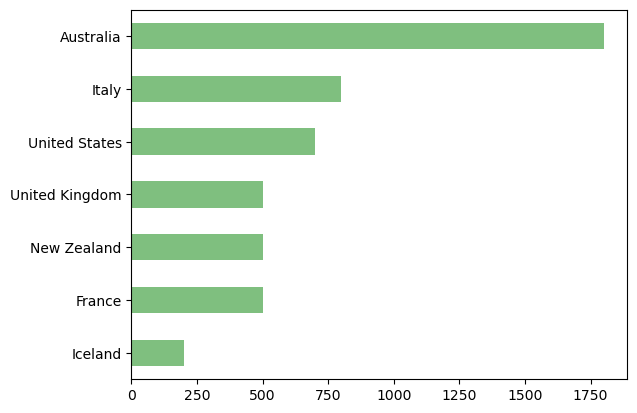

In [24]:
data.Country.value_counts(ascending=True).plot(kind='barh', color='g', alpha=0.5);

#### The `groupby` method creates a `DataFrameGroupBy` object.
The `groupby` object is a recipe for how to perform operation on the data.

To use a `groupby` object, we need to perform some operation on it.

In [25]:
grouped_by_country = data.groupby('Country')

In [26]:
grouped_by_country.size()

Country
Australia         1800
France             500
Iceland            200
Italy              800
New Zealand        500
United Kingdom     500
United States      700
dtype: int64

In [27]:
grouped_by_country.ngroups

7

In [28]:
grouped_by_country.groups

{'Australia': [500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, ...], 'France': [3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 

In [29]:
# We see that Australia starts on index 500. Check
print(data.iloc[499, :])
print(data.iloc[500, :])

GivenName                    Michael
Surname                        Lewis
Gender                          male
StreetAddress       26 Uxbridge Road
City                         SKELTON
Country               United Kingdom
Birthday         1989-10-31 00:00:00
BloodType                         O+
Age                               35
Name: 499, dtype: object
GivenName                      Cyril
Surname                        Duran
Gender                          male
StreetAddress         41 Frouds Road
City                          BAXTER
Country                    Australia
Birthday         1969-04-18 00:00:00
BloodType                         B+
Age                               55
Name: 500, dtype: object


We can compute statistics by group, i.e. will compute the function for each of the groups. Example mean age by group:

In [30]:
grouped_by_country['Age'].mean()

Country
Australia         62.817778
France            62.944000
Iceland           62.660000
Italy             61.607500
New Zealand       61.630000
United Kingdom    62.740000
United States     62.415714
Name: Age, dtype: float64

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>Recall that the <code>apply</code> method allows you to apply an <b>arbitrary function</b> to all the rows in your dataframe. Therefore, as long as you can express your operations as a function (lambda or otherwise), you can include it in the <code>apply</code>, <b>even if your function returns multiple values</b>, provided you wrap them in a tuple.</p>
</div>

In [31]:
grouped_by_country['Age'].apply(lambda x: (np.min(x), 
                                           f'{x.mean():0.2f}', 
                                           np.max(x), 
                                           f'{x.std():0.2f}')
                                )

Country
Australia         (29, 62.82, 96, 19.49)
France            (29, 62.94, 96, 19.54)
Iceland           (29, 62.66, 96, 19.46)
Italy             (29, 61.61, 96, 18.98)
New Zealand       (29, 61.63, 96, 19.05)
United Kingdom    (29, 62.74, 96, 19.53)
United States     (29, 62.42, 96, 19.29)
Name: Age, dtype: object

#### A different and nicer output can be obtained using the `agg` method on a groupby object.

In [32]:
help(grouped_by_country.agg)
grouped_by_country['Age'].agg(['min','mean','max','std'])

Help on method aggregate in module pandas.core.groupby.generic:

aggregate(func=None, *args, engine=None, engine_kwargs=None, **kwargs) method of pandas.core.groupby.generic.DataFrameGroupBy instance
    Aggregate using one or more operations over the specified axis.
    
    Parameters
    ----------
    func : function, str, list or dict
        Function to use for aggregating the data. If a function, must either
        work when passed a DataFrame or when passed to DataFrame.apply.
    
        Accepted combinations are:
    
        - function
        - string function name
        - list of functions and/or function names, e.g. ``[np.sum, 'mean']``
        - dict of axis labels -> functions, function names or list of such.
    
        Can also accept a Numba JIT function with
        ``engine='numba'`` specified. Only passing a single function is supported
        with this engine.
    
        If the ``'numba'`` engine is chosen, the function must be
        a user defined func

,min,mean,max,std
Country,,,,
Australia,29,62.817778,96,19.488031
France,29,62.944000,96,19.541869
Iceland,29,62.660000,96,19.461194
Italy,29,61.607500,96,18.981275
New Zealand,29,61.630000,96,19.049905
United Kingdom,29,62.740000,96,19.527905
United States,29,62.415714,96,19.285003


For some builtin functions you can pass the name of the function as a string.
For anything else, just pass the function object(s) to the <code>agg</code> method.

In [33]:
def minimum_age(x):
    return np.min(x)
def average_age(x):
    return np.mean(x)

grouped_by_country['Age'].agg([minimum_age, average_age])

,minimum_age,average_age
Country,,
Australia,29,62.817778
France,29,62.944000
Iceland,29,62.660000
Italy,29,61.607500
New Zealand,29,61.630000
United Kingdom,29,62.740000
United States,29,62.415714


#### For categorical variables, such as `BloodType`, basic information can be extracted using the `describe` method.

In [34]:
grouped_by_country['BloodType'].describe()

,count,unique,top,freq
Country,,,,
Australia,1800,8,O+,648
France,500,8,O+,184
Iceland,200,7,O+,86
Italy,800,8,O+,299
New Zealand,500,8,O+,185
United Kingdom,500,8,O+,188
United States,700,8,O+,273


In [35]:
grouped_by_country.GivenName.describe()

,count,unique,top,freq
Country,,,,
Australia,1800,1368,Michael,9
France,500,444,Anna,4
Iceland,200,193,Rule,2
Italy,800,677,Jennifer,6
New Zealand,500,447,James,4
United Kingdom,500,450,Ellis,3
United States,700,620,Lily,5


#### `describe` only tells us about the most frequent blood type. To get a count of the boodtypes let us use a `Counter` object.

<div style="background-color:#FBEFFB;">
<h4>Which item appears most frequently?</h4>

Counting the number of objects of a given type is such a common operation that Python has a very useful `Counter` object
from the <code>collections</code> module. 

What a <code>Counter</code> object does to a sequence of items is count how many times each unique element appears in the sequence. A <code>Counter</code> object also has several useful properties, for instance, to determine the most common object in the sequence.
</div>

In [36]:
from collections import Counter

L = ['a', 'b', 'c', 'a', 'a', 'c', 'b', 'b', 'b', 'b']
c = Counter(L)
c

Counter({'a': 3, 'b': 5, 'c': 2})

In [37]:
print(c.most_common())
print(c.most_common(2))
print(c.most_common(1))

[('b', 5), ('a', 3), ('c', 2)]
[('b', 5), ('a', 3)]
[('b', 5)]


In [38]:
grouped_by_country['BloodType'].apply(Counter)

Country            
Australia       B+     419.0
                AB+    100.0
                O-      74.0
                A+     468.0
                O+     648.0
                A-      59.0
                B-      24.0
                AB-      8.0
France          B+     106.0
                AB+     19.0
                O-      24.0
                A+     145.0
                O+     184.0
                A-      17.0
                B-       4.0
                AB-      1.0
Iceland         B+      44.0
                AB+      5.0
                O-       9.0
                A+      45.0
                O+      86.0
                A-       6.0
                B-       5.0
                AB-      NaN
Italy           B+     185.0
                AB+     37.0
                O-      32.0
                A+     207.0
                O+     299.0
                A-      31.0
                B-       4.0
                AB-      5.0
New Zealand     B+     100.0
                AB+    

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>While the <code>Counter</code> object can be very useful, the same functionality can be achieved by using the built-in pandas method <code>value_counts</code>.</p>
</div>

In [39]:
grouped_by_country['BloodType'].value_counts()

Country         BloodType
Australia       O+           648
                A+           468
                B+           419
                AB+          100
                O-            74
                A-            59
                B-            24
                AB-            8
France          O+           184
                A+           145
                B+           106
                O-            24
                AB+           19
                A-            17
                B-             4
                AB-            1
Iceland         O+            86
                A+            45
                B+            44
                O-             9
                A-             6
                AB+            5
                B-             5
                AB-            0
Italy           O+           299
                A+           207
                B+           185
                AB+           37
                O-            32
                A

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>Note how the result is one long column of information. This result is actually a Pandas <code>Series</code> object (recall that a <code>Series</code> object is essentially an array with an index).</p>

<p>It may look a bit like a dataframe, but remember that in a dataframe each column corresponds to a <b>unique</b> feature. Here, what looks like the second column is actually a second layer for the index. We will talk about the concept of multi-index shortly.  </p>
<p>The result as it stands may not be the easiest to read. It would be better if we could transform it back into a dataframe so
that we could compare the results for two countries more easily. In Pandas, you can do that with one command: <code>unstack</code>.
</p>
</div>

In [40]:
grouped_by_country['BloodType'].value_counts().unstack()

BloodType,A+,A-,AB+,AB-,B+,B-,O+,O-
Country,,,,,,,,
Australia,468,59,100,8,419,24,648,74
France,145,17,19,1,106,4,184,24
Iceland,45,6,5,0,44,5,86,9
Italy,207,31,37,5,185,4,299,32
New Zealand,154,9,21,5,100,5,185,21
United Kingdom,132,23,25,4,102,7,188,19
United States,157,25,35,4,157,15,273,34


If we want to switch the index and the columns around, we need to specify the `level` parameter in  `unstack()` which, by default, is -1, that is the last (innermost) level of the index.

In [41]:
grouped_by_country['BloodType'].value_counts().unstack(level=0) 

Country,Australia,France,Iceland,Italy,New Zealand,United Kingdom,United States
BloodType,,,,,,,
A+,468,145,45,207,154,132,157
A-,59,17,6,31,9,23,25
AB+,100,19,5,37,21,25,35
AB-,8,1,0,5,5,4,4
B+,419,106,44,185,100,102,157
B-,24,4,5,4,5,7,15
O+,648,184,86,299,185,188,273
O-,74,24,9,32,21,19,34


#### The level can also be specified by name

In [42]:
grouped_by_country['BloodType'].value_counts().unstack(level='Country') 

Country,Australia,France,Iceland,Italy,New Zealand,United Kingdom,United States
BloodType,,,,,,,
A+,468,145,45,207,154,132,157
A-,59,17,6,31,9,23,25
AB+,100,19,5,37,21,25,35
AB-,8,1,0,5,5,4,4
B+,419,106,44,185,100,102,157
B-,24,4,5,4,5,7,15
O+,648,184,86,299,185,188,273
O-,74,24,9,32,21,19,34


<p>Note that we have a  bunch of <code>NaN</code> in our dataframe. This indicates that no one from Iceland has blood type <code>AB-</code> in our dataset.</p>

<p>Since there was no such data in our dataset, it appears as a <b>missing value</b>.</p>

<p>However, here, a value of 0 would be more appropriate. We can tell the dataframe to
replace its missing values by 0 using the <code>fillna</code> method.</p>

<p>Since we are dealing with count data, it is also a good idea to convert the type to <code>int</code>.</p>

<p><b>To make things clearer we will wrap the expression in parentheses so that we can write each method on its own line.</b></p>

In [43]:
(grouped_by_country['BloodType']
    .value_counts()
    .unstack()
    .fillna(0)
    .astype(int)
)

BloodType,A+,A-,AB+,AB-,B+,B-,O+,O-
Country,,,,,,,,
Australia,468,59,100,8,419,24,648,74
France,145,17,19,1,106,4,184,24
Iceland,45,6,5,0,44,5,86,9
Italy,207,31,37,5,185,4,299,32
New Zealand,154,9,21,5,100,5,185,21
United Kingdom,132,23,25,4,102,7,188,19
United States,157,25,35,4,157,15,273,34


<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>We are using <b>fake data</b> so do not give too much credence to these results. </p>

<p>This being said,  blood type frequencies do vary
across countries and you can read more about it <a href="http://en.wikipedia.org/wiki/Blood_type_distribution_by_country">here</a>.
</p>
</div>

<h3> <center><font color=MediumVioletRed>C. GroupBy on multiple features.</font></center></h3>

Of, course, <code>GroupBy</code> operations are not limited to single features.

If we want to see the data grouped by country <b>and</b> blood type , we just need to specify both features in constructing the <code>GroupBy</code> object.

Note that with a <code>groupby</code> on multiple features we can obtain the previous result in a different way.

In [44]:
(data
 .groupby(['Country','BloodType'])
 .count()
 .iloc[:, 0]
 .unstack()
 .fillna(0)
 .astype(int)
)


BloodType,A+,A-,AB+,AB-,B+,B-,O+,O-
Country,,,,,,,,
Australia,468,59,100,8,419,24,648,74
France,145,17,19,1,106,4,184,24
Iceland,45,6,5,0,44,5,86,9
Italy,207,31,37,5,185,4,299,32
New Zealand,154,9,21,5,100,5,185,21
United Kingdom,132,23,25,4,102,7,188,19
United States,157,25,35,4,157,15,273,34


#### Let us group our data based on country and gender.

In [45]:
grouped_by_country_and_gender = data.groupby(['Country', 'Gender'])

In [46]:
(grouped_by_country_and_gender['BloodType']
 .value_counts() 
 .unstack()
 .fillna(0)
 .astype(int)
)

BloodType               A+  A-  AB+  AB-   B+  B-   O+  O-
Country        Gender                                     
Australia      female  229  29   54    4  205  13  328  41
               male    239  30   46    4  214  11  320  33
France         female   76  11   10    0   47   2   79  16
               male     69   6    9    1   59   2  105   8
Iceland        female   22   5    2    0   17   4   34   8
               male     23   1    3    0   27   1   52   1
Italy          female  102  14   22    1   89   1  160  17
               male    105  17   15    4   96   3  139  15
New Zealand    female   75   5    8    1   53   2   91   9
               male     79   4   13    4   47   3   94  12
United Kingdom female   65   6   14    1   55   4   99  13
               male     67  17   11    3   47   3   89   6
United States  female   89  13   18    3   77   7  138  12
               male     68  12   17    1   80   8  135  22

In [47]:
grouped_by_country_and_gender.mean()

C:\Users\144052\AppData\Local\Temp\ipykernel_4704\992333812.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_country_and_gender.mean()


Age
Country        Gender           
Australia      female  63.101883
               male    62.531773
France         female  64.207469
               male    61.768340
Iceland        female  62.315217
               male    62.953704
Italy          female  62.300493
               male    60.893401
New Zealand    female  60.823770
               male    62.398438
United Kingdom female  62.284047
               male    63.222222
United States  female  62.299720
               male    62.536443

Notice how we did not specify the `Age` feature. Pandas automatically outputs results for which the `mean` function makes sense. Here only Age fits the bill.


Like with any dataframe, you can also use `apply` to map a function to the grouped data, however, for anything more complex, like applying multiple functions at once, the `agg` method is more convenient.

In [48]:
grouped_by_country_and_gender['Age'].agg(['min','max','mean','std'])

min  max       mean        std
Country        Gender                                
Australia      female   29   96  63.101883  19.587278
               male     29   96  62.531773  19.394326
France         female   30   96  64.207469  19.041143
               male     29   96  61.768340  19.961407
Iceland        female   29   96  62.315217  19.527343
               male     29   96  62.953704  19.490896
Italy          female   29   96  62.300493  19.116494
               male     29   95  60.893401  18.838508
New Zealand    female   29   96  60.823770  19.546233
               male     29   96  62.398438  18.570202
United Kingdom female   29   96  62.284047  20.168651
               male     29   96  63.222222  18.856132
United States  female   29   96  62.299720  19.167134
               male     29   96  62.536443  19.434197

<h4> For descriptive statistics of numerical data, the <code>quantile</code> function is also useful.</h4>
<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>The 0.5 quantile is the <b>median</b> of our data.</p>
</div>

In [49]:
grouped_by_country_and_gender['Age'].quantile((0.10, 0.25, 0.5, 0.75, 0.90)).unstack()

0.10   0.25  0.50   0.75  0.90
Country        Gender                                
Australia      female  36.0  46.00  63.0  80.00  90.0
               male    35.0  46.00  63.0  79.00  90.0
France         female  36.0  49.00  66.0  81.00  89.0
               male    35.0  42.00  62.0  80.00  88.0
Iceland        female  37.1  45.75  64.0  79.00  88.9
               male    37.0  47.00  61.5  79.00  90.0
Italy          female  36.0  46.00  62.0  78.00  90.0
               male    36.0  44.00  60.0  76.00  89.0
New Zealand    female  34.3  44.00  59.0  77.25  88.0
               male    37.0  46.00  63.0  77.00  88.5
United Kingdom female  34.6  44.00  62.0  80.00  90.0
               male    35.2  48.00  64.0  78.00  88.0
United States  female  36.0  46.00  62.0  79.00  89.0
               male    35.0  45.50  63.0  79.00  88.0

<div>
<br>
<br>

<div style="background-color:#F7F2E0;">
<h1> <font color=MediumVioletRed>Practice makes perfect.</font></h1>

<p>Use the <code>grouped_by_country_and_gender</code> object to output the number of people who were born
on a given month (numbered 1 to 12), for each country, and for each gender.</p>

<p><b>Hint:</b>
This can be done in one line using <code>apply</code> and <code>value_counts</code>, but you need to make sure you keep track of the type of object you are dealing with at each stage of the pipeline.</p>
</div>
<br>
<br>
<br>
</div>

<h3> <center><font color=MediumVioletRed>D. MultiIndex.</font></center></h3>

<h4> We can of course group the data by more than 2 features.</h4>
However, results might get a bit harder to take in.

In [50]:
s = data.groupby(['Country','Gender','BloodType'])['Age'].mean().round(2)
s

Country        Gender  BloodType
Australia      female  A+           64.36
                       A-           64.90
                       AB+          58.13
                       AB-          66.50
                       B+           61.62
                                    ...  
United States  male    AB-          71.00
                       B+           59.34
                       B-           76.25
                       O+           66.33
                       O-           60.73
Name: Age, Length: 112, dtype: float64

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p><code>s</code> is a Pandas <code>Series</code> object with a <code>MultiIndex</code> object as its index.
</p>
</div>

In [51]:
s.index

MultiIndex([(    'Australia', 'female',  'A+'),
            (    'Australia', 'female',  'A-'),
            (    'Australia', 'female', 'AB+'),
            (    'Australia', 'female', 'AB-'),
            (    'Australia', 'female',  'B+'),
            (    'Australia', 'female',  'B-'),
            (    'Australia', 'female',  'O+'),
            (    'Australia', 'female',  'O-'),
            (    'Australia',   'male',  'A+'),
            (    'Australia',   'male',  'A-'),
            ...
            ('United States', 'female',  'O+'),
            ('United States', 'female',  'O-'),
            ('United States',   'male',  'A+'),
            ('United States',   'male',  'A-'),
            ('United States',   'male', 'AB+'),
            ('United States',   'male', 'AB-'),
            ('United States',   'male',  'B+'),
            ('United States',   'male',  'B-'),
            ('United States',   'male',  'O+'),
            ('United States',   'male',  'O-')],
           names=['Coun

We can convert the MultiIndexed series to a MultiIndexed dataframe using unstack.

In [52]:
df = s.unstack().fillna(0)
df

BloodType                 A+     A-    AB+    AB-     B+     B-     O+     O-
Country        Gender                                                        
Australia      female  64.36  64.90  58.13  66.50  61.62  71.00  63.46  63.02
               male    62.67  56.70  64.98  67.00  63.79  49.73  61.94  64.76
France         female  63.54  58.09  68.40   0.00  63.47  66.50  65.18  66.06
               male    65.81  61.00  67.78  46.00  60.03  72.00  58.90  70.62
Iceland        female  61.95  68.40  68.00   0.00  65.06  72.25  58.15  65.00
               male    67.09  40.00  62.00   0.00  64.37  79.00  60.13  86.00
Italy          female  60.68  60.36  73.50  51.00  61.07  62.00  62.96  60.12
               male    59.45  59.47  67.60  49.75  59.82  71.00  62.32  60.47
New Zealand    female  62.49  64.20  55.50  72.00  63.19  50.00  58.22  63.33
               male    65.39  79.75  70.08  69.00  58.96  57.33  59.68  62.42
United Kingdom female  63.42  68.17  54.79  68.00  60.33  70.50  62.16  68.23
               male    62.39  65.41  58.91  70.33  64.68  37.67  63.37  69.83
United States  female  62.46  76.54  63.44  58.67  60.75  70.57  62.57  46.83
               male    60.07  52.08  60.12  71.00  59.34  76.25  66.33  60.73

To access specific data using the MultiIndex for a __Series__, you can use the `xs` method and specify the level at which you are extracting the data, if you are not using the top level.

To access specific data using the MultiIndex for a __DataFrame__, you can use the `loc` method, but specifying the level is a bit more involved.

#### Top level selection

In [53]:
s['Australia']

Gender  BloodType
female  A+           64.36
        A-           64.90
        AB+          58.13
        AB-          66.50
        B+           61.62
        B-           71.00
        O+           63.46
        O-           63.02
male    A+           62.67
        A-           56.70
        AB+          64.98
        AB-          67.00
        B+           63.79
        B-           49.73
        O+           61.94
        O-           64.76
Name: Age, dtype: float64

In [54]:
df.loc['Australia', :]

BloodType,A+,A-,AB+,AB-,B+,B-,O+,O-
Gender,,,,,,,,
female,64.36,64.9,58.13,66.5,61.62,71.00,63.46,63.02
male,62.67,56.7,64.98,67.0,63.79,49.73,61.94,64.76


This is equivalent to:

In [55]:
s['Australia'].unstack()

BloodType,A+,A-,AB+,AB-,B+,B-,O+,O-
Gender,,,,,,,,
female,64.36,64.9,58.13,66.5,61.62,71.00,63.46,63.02
male,62.67,56.7,64.98,67.0,63.79,49.73,61.94,64.76


The levels can be exchanged either by unstacking the right level, or by transposing the resulting dataframe.

In [56]:
s['Australia'].unstack(level='Gender')

Gender,female,male
BloodType,,
A+,64.36,62.67
A-,64.90,56.70
AB+,58.13,64.98
AB-,66.50,67.00
B+,61.62,63.79
B-,71.00,49.73
O+,63.46,61.94
O-,63.02,64.76


In [57]:
s['Australia'].unstack().T

Gender,female,male
BloodType,,
A+,64.36,62.67
A-,64.90,56.70
AB+,58.13,64.98
AB-,66.50,67.00
B+,61.62,63.79
B-,71.00,49.73
O+,63.46,61.94
O-,63.02,64.76


#### To select data at a deeper level of the multiindex, you need to  specify the level.
#### Here is an example with Gender.
Notice the different syntax using `xs`.

In [58]:
s.xs('female', level='Gender').unstack()

BloodType,A+,A-,AB+,AB-,B+,B-,O+,O-
Country,,,,,,,,
Australia,64.36,64.90,58.13,66.50,61.62,71.00,63.46,63.02
France,63.54,58.09,68.40,NaN,63.47,66.50,65.18,66.06
Iceland,61.95,68.40,68.00,NaN,65.06,72.25,58.15,65.00
Italy,60.68,60.36,73.50,51.00,61.07,62.00,62.96,60.12
New Zealand,62.49,64.20,55.50,72.00,63.19,50.00,58.22,63.33
United Kingdom,63.42,68.17,54.79,68.00,60.33,70.50,62.16,68.23
United States,62.46,76.54,63.44,58.67,60.75,70.57,62.57,46.83


#### Selecting the data from a deeper level is trickier with a dataframe. We need to specify an index `slice`.

In [59]:
df.loc[(slice(None), 'female'), :].droplevel('Gender')

BloodType,A+,A-,AB+,AB-,B+,B-,O+,O-
Country,,,,,,,,
Australia,64.36,64.90,58.13,66.50,61.62,71.00,63.46,63.02
France,63.54,58.09,68.40,0.00,63.47,66.50,65.18,66.06
Iceland,61.95,68.40,68.00,0.00,65.06,72.25,58.15,65.00
Italy,60.68,60.36,73.50,51.00,61.07,62.00,62.96,60.12
New Zealand,62.49,64.20,55.50,72.00,63.19,50.00,58.22,63.33
United Kingdom,63.42,68.17,54.79,68.00,60.33,70.50,62.16,68.23
United States,62.46,76.54,63.44,58.67,60.75,70.57,62.57,46.83


or alternatively, using a pandas <code>IndexSlice</code> object.

In [60]:
idx = pd.IndexSlice

In [61]:
df.loc[idx[:, 'female'], :].droplevel('Gender')

BloodType,A+,A-,AB+,AB-,B+,B-,O+,O-
Country,,,,,,,,
Australia,64.36,64.90,58.13,66.50,61.62,71.00,63.46,63.02
France,63.54,58.09,68.40,0.00,63.47,66.50,65.18,66.06
Iceland,61.95,68.40,68.00,0.00,65.06,72.25,58.15,65.00
Italy,60.68,60.36,73.50,51.00,61.07,62.00,62.96,60.12
New Zealand,62.49,64.20,55.50,72.00,63.19,50.00,58.22,63.33
United Kingdom,63.42,68.17,54.79,68.00,60.33,70.50,62.16,68.23
United States,62.46,76.54,63.44,58.67,60.75,70.57,62.57,46.83


#### Same if you want to select `BloodType` as the level.

In [62]:
s.xs('O+', level='BloodType').unstack().fillna(0) 

Gender,female,male
Country,,
Australia,63.46,61.94
France,65.18,58.90
Iceland,58.15,60.13
Italy,62.96,62.32
New Zealand,58.22,59.68
United Kingdom,62.16,63.37
United States,62.57,66.33


In [63]:
df.loc[:, ['O+']].unstack().droplevel('BloodType', axis='columns')

Gender,female,male
Country,,
Australia,63.46,61.94
France,65.18,58.90
Iceland,58.15,60.13
Italy,62.96,62.32
New Zealand,58.22,59.68
United Kingdom,62.16,63.37
United States,62.57,66.33


#### Multiple levels can be specified at once

In [64]:
s.xs(('Australia','female'), level=['Country','Gender'])

BloodType
A+     64.36
A-     64.90
AB+    58.13
AB-    66.50
B+     61.62
B-     71.00
O+     63.46
O-     63.02
Name: Age, dtype: float64

In [65]:
df.loc[('Australia', 'female'), :]

BloodType
A+     64.36
A-     64.90
AB+    58.13
AB-    66.50
B+     61.62
B-     71.00
O+     63.46
O-     63.02
Name: (Australia, female), dtype: float64

In [66]:
s.xs(('Australia','O+'), level=['Country','BloodType'])

Gender
female    63.46
male      61.94
Name: Age, dtype: float64

In [67]:
df.loc['Australia', 'O+']

Gender
female    63.46
male      61.94
Name: O+, dtype: float64

## Let us try to visualise some of these results

In [68]:
# colormap from matplotlib
from matplotlib import cm

# Also see this stackoverflow post for the legend placement: 
# http://stackoverflow.com/questions/23556153/how-to-put-legend-outside-the-plot-with-pandas

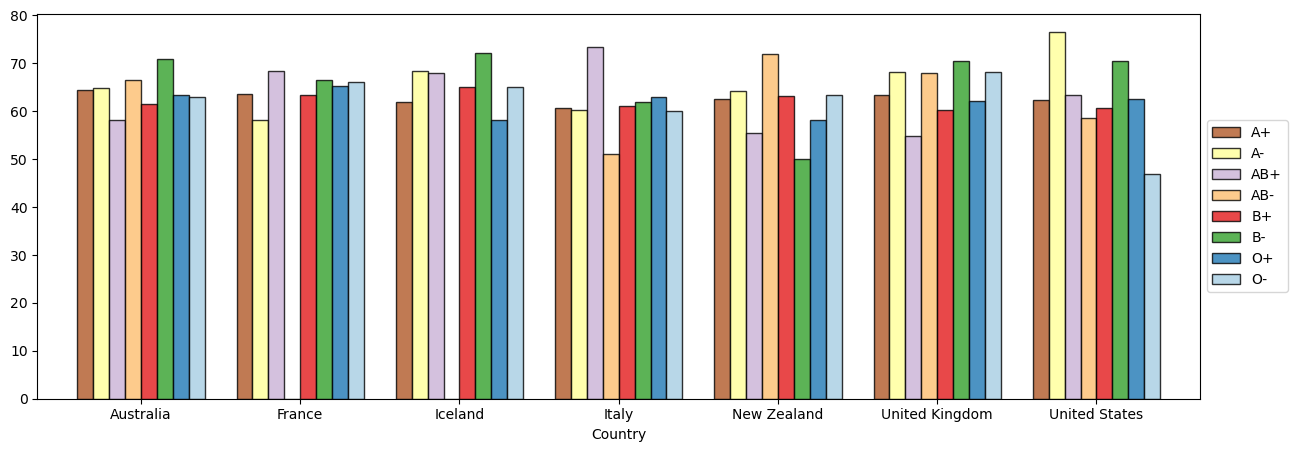

In [69]:
ax = (s.xs('female', level='Gender')
       .unstack()
       .fillna(0)
       .plot(kind='bar', 
             figsize=(15,5), 
             width=0.8, 
             alpha=0.8, 
             ec='k',
             rot=0,
             colormap=cm.Paired_r)
     )
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### Notice the difference between the previous plot and the one below. The above is the distribution of blood type groups conditional on country. The below is the distribution countries conditional of blood type group. 

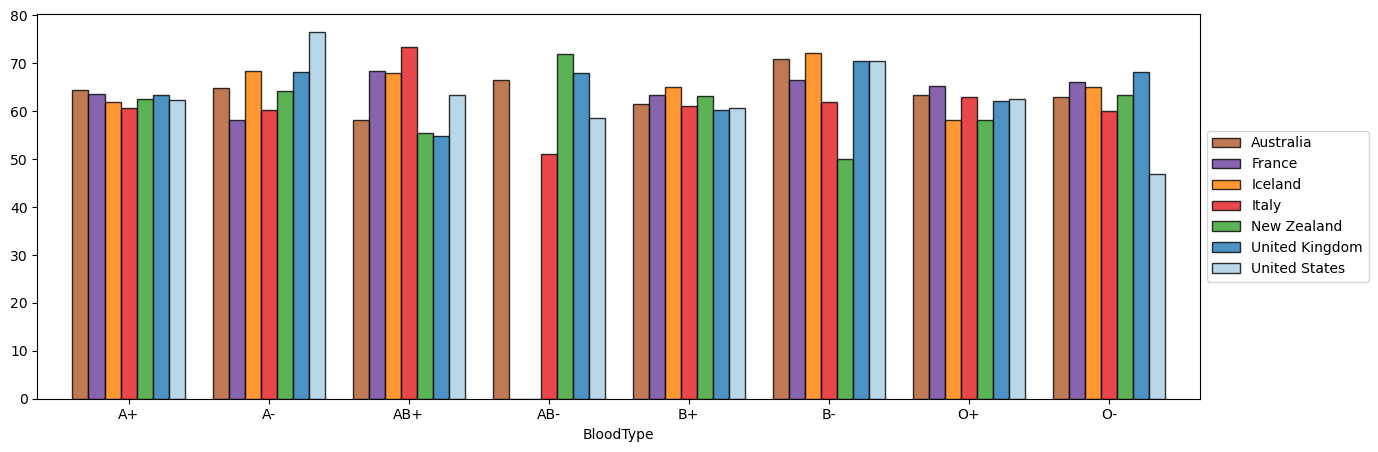

In [70]:
ax = (s.xs('female', level='Gender')
       .unstack('Country')
       .fillna(0)
       .plot(kind='bar', 
             figsize=(15,5), 
             width=0.8, 
             alpha=0.8, 
             ec='k',
             rot=0,
             colormap=cm.Paired_r)
     )
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<h3> <center><font color=MediumVioletRed>E. Fine Tuning.</font></center></h3>

So far we have applied an operation on a <b>single feature</b> of a GroupBy object. 

For instance, we have computed the mean for the <code>Age</code> feature, and then, <b>in a separate computation</b> we have computed 
a count of the blood types.

You can actually do everything at once by specifying <b>a different operation for each feature</b> using a dictionary,
and use the <code>agg</code> method to aggregate the data across the dataframe.

In [71]:
group = data.groupby(['Country', 'Gender'])

def data_count(x):
    return Counter(x).items()

method = {'Age': [np.mean, np.std], 'BloodType': data_count}

In [72]:
group.agg(method)

Age             \
                            mean        std   
Country        Gender                         
Australia      female  63.101883  19.587278   
               male    62.531773  19.394326   
France         female  64.207469  19.041143   
               male    61.768340  19.961407   
Iceland        female  62.315217  19.527343   
               male    62.953704  19.490896   
Italy          female  62.300493  19.116494   
               male    60.893401  18.838508   
New Zealand    female  60.823770  19.546233   
               male    62.398438  18.570202   
United Kingdom female  62.284047  20.168651   
               male    63.222222  18.856132   
United States  female  62.299720  19.167134   
               male    62.536443  19.434197   

                                                               BloodType  
                                                              data_count  
Country        Gender                                                     
Australia      female  ((B+, 205), (O-, 41), (AB+, 54), (O+, 328), (A...  
               male    ((B+, 214), (AB+, 46), (A+, 239), (O+, 320), (...  
France         female  ((A-, 11), (B+, 47), (A+, 76), (O+, 79), (O-, ...  
               male    ((B+, 59), (A+, 69), (AB+, 9), (O+, 105), (O-,...  
Iceland        female  ((O+, 34), (A+, 22), (B-, 4), (B+, 17), (A-, 5...  
               male    ((O+, 52), (A+, 23), (AB+, 3), (B+, 27), (O-, ...  
Italy          female  ((A+, 102), (O+, 160), (B+, 89), (O-, 17), (AB...  
               male    ((A+, 105), (O+, 139), (B+, 96), (AB-, 4), (B-...  
New Zealand    female  ((O-, 9), (O+, 91), (A+, 75), (AB+, 8), (B+, 5...  
               male    ((A+, 79), (O+, 94), (AB+, 13), (B+, 47), (O-,...  
United Kingdom female  ((A+, 65), (B+, 55), (O-, 13), (O+, 99), (AB+,...  
               male    ((A+, 67), (B+, 47), (O-, 6), (A-, 17), (O+, 8...  
United States  female  ((A+, 89), (B+, 77), (O+, 138), (AB+, 18), (A-...  
               male    ((A+, 68), (O+, 135), (B+, 80), (A-, 12), (AB+...

#### Accessing a particular portion of the result is just a matter of navigating the multilevel structure of the multiindex and the columns.

In [73]:
group.agg(method).loc[[('Australia', 'male')]]

Age             \
                       mean        std   
Country   Gender                         
Australia male    62.531773  19.394326   

                                                          BloodType  
                                                         data_count  
Country   Gender                                                     
Australia male    ((B+, 214), (AB+, 46), (A+, 239), (O+, 320), (...

This is equivalent to

In [74]:
group.agg(method).xs(('Australia', 'male'), level=['Country', 'Gender'])

Age             \
                       mean        std   
Country   Gender                         
Australia male    62.531773  19.394326   

                                                          BloodType  
                                                         data_count  
Country   Gender                                                     
Australia male    ((B+, 214), (AB+, 46), (A+, 239), (O+, 320), (...

#### Notice the difference with

In [75]:
group.agg(method).xs(('Australia', 'male'))

Age        mean                                                  62.531773
           std                                                   19.394326
BloodType  data_count    ((B+, 214), (AB+, 46), (A+, 239), (O+, 320), (...
Name: (Australia, male), dtype: object

#### We can select data using levels of the columns.

In [76]:
group.agg(method).loc[:,[('Age', 'mean')]]

Age
                            mean
Country        Gender           
Australia      female  63.101883
               male    62.531773
France         female  64.207469
               male    61.768340
Iceland        female  62.315217
               male    62.953704
Italy          female  62.300493
               male    60.893401
New Zealand    female  60.823770
               male    62.398438
United Kingdom female  62.284047
               male    63.222222
United States  female  62.299720
               male    62.536443

This is equivalent to

In [77]:
group.agg(method).xs(('Age', 'mean'), axis=1)

Country         Gender
Australia       female    63.101883
                male      62.531773
France          female    64.207469
                male      61.768340
Iceland         female    62.315217
                male      62.953704
Italy           female    62.300493
                male      60.893401
New Zealand     female    60.823770
                male      62.398438
United Kingdom  female    62.284047
                male      63.222222
United States   female    62.299720
                male      62.536443
Name: (Age, mean), dtype: float64

#### You can go as "deep" as you need.

In [78]:
display(group.agg(method).loc['Australia', 'female'])
display(group.agg(method).loc['Australia', 'female']['Age'])
display(group.agg(method).loc['Australia', 'female']['Age']['mean'])

Age        mean                                                  63.101883
           std                                                   19.587278
BloodType  data_count    ((B+, 205), (O-, 41), (AB+, 54), (O+, 328), (A...
Name: (Australia, female), dtype: object

mean    63.101883
std     19.587278
Name: (Australia, female), dtype: object

63.10188261351052

This is equivalent to

In [79]:
group.agg(method).xs(('Australia', 'female'))['Age']['mean']

63.10188261351052

#### To extract just the values (without the index), use the `values` attribute.

In [80]:
group.agg(method).loc['Australia', 'female']['BloodType'].values

array([dict_items([('B+', 205), ('O-', 41), ('AB+', 54), ('O+', 328), ('A+', 229), ('A-', 29), ('B-', 13), ('AB-', 4)])],
      dtype=object)

#### Cross-tabulation is an effective way to have a quick look at how the data is distributed across categories.

In [81]:
pd.crosstab(data.Gender, data.BloodType, margins=True)

BloodType,A+,A-,AB+,AB-,B+,B-,O+,O-,All
Gender,,,,,,,,,
female,658,83,128,10,543,33,929,116,2500
male,650,87,114,17,570,31,934,97,2500
All,1308,170,242,27,1113,64,1863,213,5000


In [82]:
pd.crosstab([data.Country, data.Gender], data.BloodType, margins=True)

BloodType                A+   A-  AB+  AB-    B+  B-    O+   O-   All
Country        Gender                                                
Australia      female   229   29   54    4   205  13   328   41   903
               male     239   30   46    4   214  11   320   33   897
France         female    76   11   10    0    47   2    79   16   241
               male      69    6    9    1    59   2   105    8   259
Iceland        female    22    5    2    0    17   4    34    8    92
               male      23    1    3    0    27   1    52    1   108
Italy          female   102   14   22    1    89   1   160   17   406
               male     105   17   15    4    96   3   139   15   394
New Zealand    female    75    5    8    1    53   2    91    9   244
               male      79    4   13    4    47   3    94   12   256
United Kingdom female    65    6   14    1    55   4    99   13   257
               male      67   17   11    3    47   3    89    6   243
United States  female    89   13   18    3    77   7   138   12   357
               male      68   12   17    1    80   8   135   22   343
All                    1308  170  242   27  1113  64  1863  213  5000

<h3> <center><font color=MediumVioletRed>F. GroupBy on continuous features.</font></center></h3>

We have seen how we can group the data according to the features that are in the original dataset. 

For instance, grouping the data by country is trivial. Same for the blood type because these are <b>categorical</b> data.

But what about <code>Age</code>? If we do a <code>groupby</code> without thinking too much about it we get something rather useless.

In [83]:
g = data.groupby('Age')
g['BloodType'].describe().unstack()

       Age
count  29     37
       30     72
       31     73
       32     86
       33     69
              ..
freq   92     32
       93     23
       94     30
       95     24
       96     18
Length: 272, dtype: object

#### We get one entry for each year of `Age` which is not really grouping. 

#### Ideally, we would want to split the data into age groups and use that to group the data. Pandas has a `cut` function that allows us to do that.

In [84]:
data.Age.describe()

count    5000.000000
mean       62.447600
std        19.339422
min        29.000000
25%        46.000000
50%        62.000000
75%        79.000000
max        96.000000
Name: Age, dtype: float64

In [85]:
bins = np.arange(20, 100, 10)
bins

array([20, 30, 40, 50, 60, 70, 80, 90])

In [86]:
labels = pd.cut(data.Age, bins)
labels[:5]

0    (50.0, 60.0]
1    (60.0, 70.0]
2    (50.0, 60.0]
3             NaN
4    (70.0, 80.0]
Name: Age, dtype: category
Categories (7, interval[int64, right]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]

In [87]:
data.Age.head()

0    56
1    62
2    60
3    91
4    78
Name: Age, dtype: int64

#### We can use the newly created label to partition the Age variable into intervals.

In [88]:
grouped = data.groupby(['Country', labels])

grouped.size().unstack().fillna(0)

Age,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]"
Country,,,,,,,
Australia,39,264,249,296,255,272,267
France,8,81,66,75,78,67,85
Iceland,5,26,37,29,24,32,34
Italy,16,115,142,120,138,103,98
New Zealand,13,82,63,87,75,79,66
United Kingdom,10,78,69,80,63,87,70
United States,18,104,103,107,98,112,105


If we want the `Age` groups to be our index we can use `unstack(0)` or the more explicit and therefore better, `unstack('Country')` .

In [89]:
grouped.size().unstack('Country').fillna(0)

Country,Australia,France,Iceland,Italy,New Zealand,United Kingdom,United States
Age,,,,,,,
"(20, 30]",39,8,5,16,13,10,18
"(30, 40]",264,81,26,115,82,78,104
"(40, 50]",249,66,37,142,63,69,103
"(50, 60]",296,75,29,120,87,80,107
"(60, 70]",255,78,24,138,75,63,98
"(70, 80]",272,67,32,103,79,87,112
"(80, 90]",267,85,34,98,66,70,105


#### Just like before, we can pass more features to the `groupby` method.

In [90]:
grouped = data.groupby(['Country', 'BloodType', labels])
grouped.size().unstack('BloodType').fillna(0)

BloodType                A+  A-  AB+  AB-  B+  B-   O+  O-
Country        Age                                        
Australia      (20, 30]   7   2    4    0  13   1   10   2
               (30, 40]  63  15   15    0  64   2   93  12
               (40, 50]  68   5   14    3  55   5   91   8
               (50, 60]  82   8   18    1  65   2  109  11
               (60, 70]  61   7   14    0  61   6   94  12
               (70, 80]  74   5   11    0  55   4  112  11
               (80, 90]  72  12   16    4  68   3   85   7
France         (20, 30]   3   0    0    0   3   0    2   0
               (30, 40]  20   4    1    0  21   0   32   3
               (40, 50]  18   4    4    1  12   0   24   3
               (50, 60]  20   2    2    0  13   1   34   3
               (60, 70]  21   1    4    0  21   1   28   2
               (70, 80]  21   2    1    0  13   1   22   7
               (80, 90]  29   4    4    0  14   1   30   3
Iceland        (20, 30]   1   0    0    0   1   0    3   0
               (30, 40]   5   1    1    0   3   1   15   0
               (40, 50]   7   2    0    0  10   0   16   2
               (50, 60]   5   0    2    0   4   0   16   2
               (60, 70]   7   0    0    0   9   0    7   1
               (70, 80]   7   1    1    0   7   2   13   1
               (80, 90]   9   2    0    0   7   2   11   3
Italy          (20, 30]   3   0    0    0   7   0    5   1
               (30, 40]  34   8    1    1  26   0   41   4
               (40, 50]  42   6    6    2  34   0   45   7
               (50, 60]  32   3    1    1  25   1   52   5
               (60, 70]  34   2   11    1  36   1   49   4
               (70, 80]  28   3    5    0  20   1   42   4
               (80, 90]  23   5    7    0  22   1   37   3
New Zealand    (20, 30]   6   0    0    0   4   0    3   0
               (30, 40]  18   1    3    1  18   1   36   4
               (40, 50]  14   0    2    0  10   1   32   4
               (50, 60]  27   1    4    0  18   1   33   3
               (60, 70]  26   3    4    1  13   1   25   2
               (70, 80]  32   1    4    1  14   1   24   2
               (80, 90]  22   2    3    2  15   0   18   4
United Kingdom (20, 30]   1   0    1    0   3   1    4   0
               (30, 40]  21   3    5    0  17   1   29   2
               (40, 50]  21   2    6    0  14   2   24   0
               (50, 60]  20   2    2    1  17   0   33   5
               (60, 70]  16   5    5    1   9   1   24   2
               (70, 80]  20   7    3    2  20   0   30   5
               (80, 90]  23   2    1    0  14   1   27   2
United States  (20, 30]   5   0    0    0   4   0    8   1
               (30, 40]  28   4    7    0  20   1   37   7
               (40, 50]  21   0    4    1  35   2   33   7
               (50, 60]  22   8    7    1  23   0   40   6
               (60, 70]  28   3    4    0  25   1   33   4
               (70, 80]  15   4    6    2  21   6   52   6
               (80, 90]  28   2    3    0  20   3   47   2

<br>
<br>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1> Practice, Practice, Practice</h1>
<ul>

<li> Work through the notebook again and make sure you understand <em>every concept and every line of code</em>.</li><br>
<li> Do the tutorial problems that you can find on Canvas..</li><br>
<li> Read the following article on <a href="https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428"><em>minimally sufficient pandas</em></a>.</li><br>
<li> Have a look at the <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html">categorical data type in pandas</a>.</li> <br>
<li>Work through sections 8, 9, and 10 of the pandas chapter of the <a href="http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.08-Aggregation-and-Grouping.ipynb">Python Data Science Handbook</a> by Jake VanderPlas.</li><br>
</ul>


<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<div style="background-color:#F2FBEF;">
<h1><font color=#04B404>Self-paced learning: PDA Chapter 10.</font></h1><br/>

<p>Work through the chapter.</p>

<p><b>Do not simply copy and paste code into the notebook (unless it is a long array of numbers).</b></p>
<p><b>Type the code and
think about what you are doing. Make sure you understand what each part of the code does.</b></p>

<p>
<b>Be sure
to save and backup your work</b>.</p>
</div>



> Material by Adel Rahmani